# Diabetes Risk Prediction
Source of the dataset: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.


---


###Dataset Information
This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient. This has been collected using direct questionnaires from the patients of Sylhet Diabetes
Hospital in Sylhet, Bangladesh and approved by a doctor.



---

###Attributes Information
Age 1.20-65<br>
Sex 1. Male, 2.Female<br>
Polyuria 1.Yes, 2.No.<br>
Polydipsia 1.Yes, 2.No.<br>
sudden weight loss 1.Yes, 2.No.<br>
weakness 1.Yes, 2.No.<br>
Polyphagia 1.Yes, 2.No.<br>
Genital thrush 1.Yes, 2.No.<br>
visual blurring 1.Yes, 2.No.<br>
Itching 1.Yes, 2.No.<br>
Irritability 1.Yes, 2.No.<br>
delayed healing 1.Yes, 2.No.<br>
partial paresis 1.Yes, 2.No.<br>
muscle stiness 1.Yes, 2.No.<br>
Alopecia 1.Yes, 2.No.<br>
Obesity 1.Yes, 2.No.<br>
Class 1.Positive, 2.Negative.<br>

---

###Objective:
This predictive data analysis could help the doctors and patients to find if there is risk of being affected by diabetes and further help them to precautionary measures and required treatment.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv('/content/drive/My Drive/Python files/Own Projects/Diabetes Prediction/diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
df.shape

(520, 17)

Positive    320
Negative    200
Name: class, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


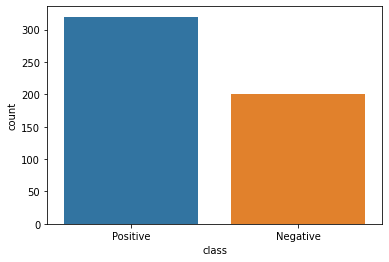

In [ ]:
print(df['class'].value_counts())
sns.countplot(df['class'])
plt.show()

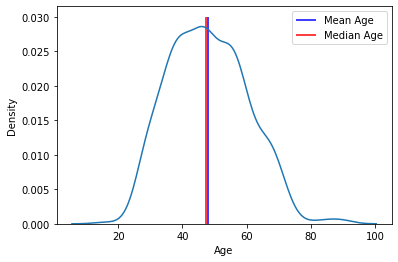

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.distplot(df['Age'],hist=False)
plt.vlines(df['Age'].mean(),0,0.03,label='Mean Age',colors='b')
plt.vlines(df['Age'].median(),0,0.03,label='Median Age',colors='r')
plt.legend()
plt.show()
plt.savefig('/content/drive/My Drive/Python files/Own Projects/Diabetes Prediction/age_dist.jpg')

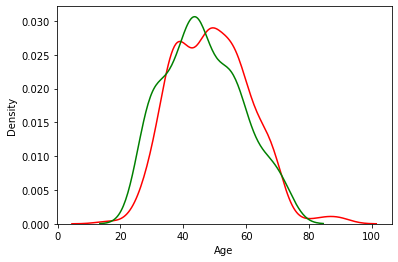

In [9]:
sns.distplot(df[df['class']=='Positive']['Age'],hist=False,label='Diabetes Patients Age',color='red')
sns.distplot(df[df['class']=='Negative']['Age'],hist=False,label='Normal Patients Age',color='green')
plt.show()

Count plots of categorical features:


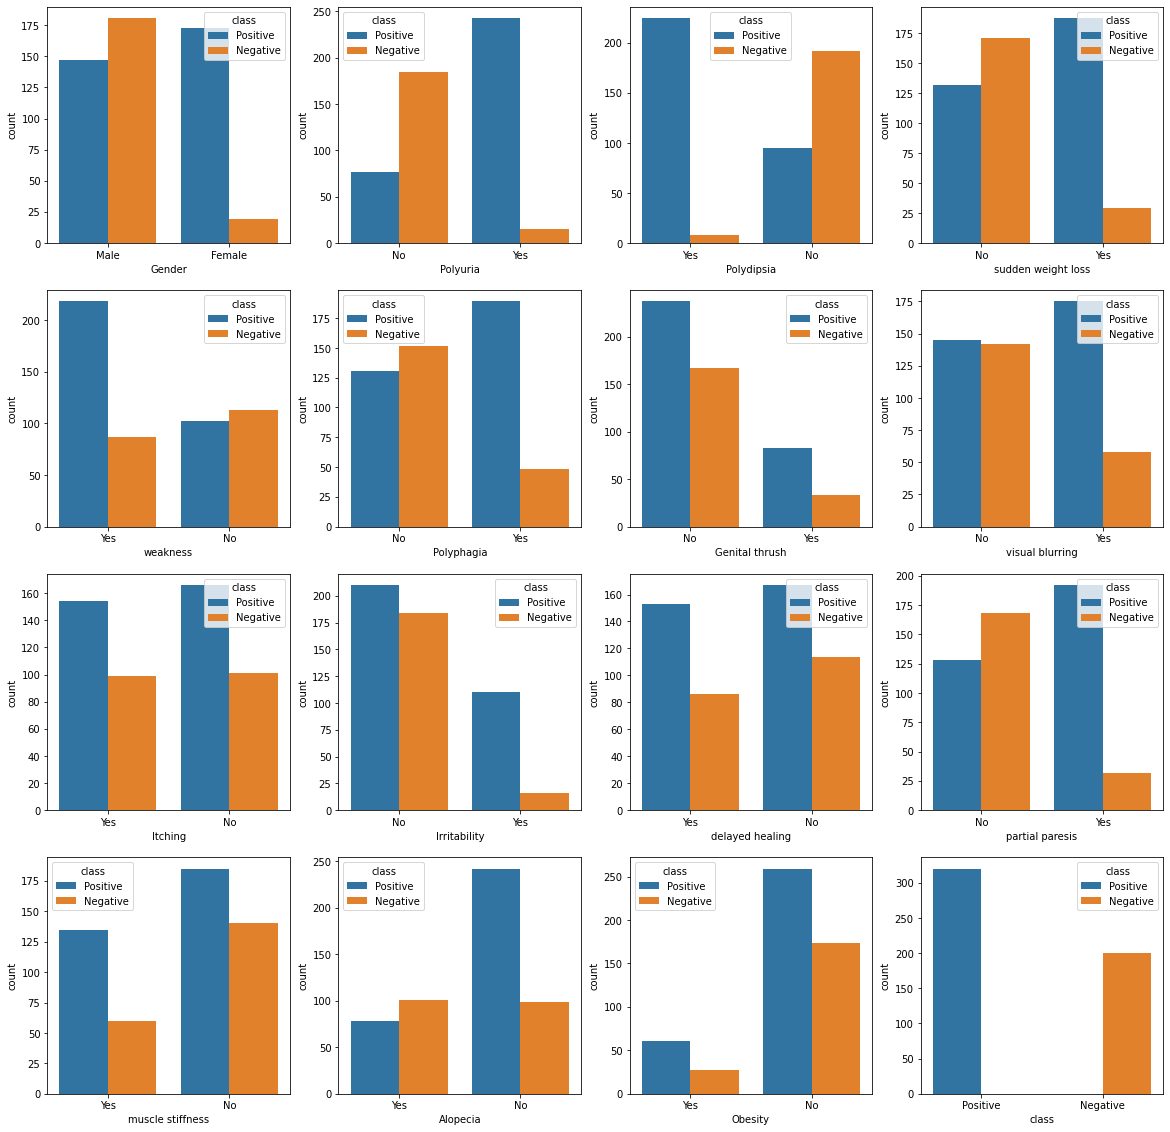

In [11]:
fig,axs=plt.subplots(4,4,figsize=(20,20))
count=1
for i in range(4):
  for j in range(4):
    sns.countplot(df[df.columns[count]],ax=axs[i][j],hue=df['class'])
    count+=1
print('Count plots of categorical features:')
plt.show()

In [14]:
import scipy.stats as stats

In [12]:
def perform_chi2cont(x_feature):
  ct=pd.crosstab(df['class'],df[x_feature])
  chi2stat,pval,dof,exp_f=stats.chi2_contingency(ct)
  return pval
def perform_ttest(x_feature):
  positive_data=df[df['class']=='Positive'][x_feature]
  neagtive_data=df[df['class']=='Negative'][x_feature]
  stat,pval=stats.ttest_ind(positive_data,neagtive_data)
  return pval

In [15]:
x_features=[i for i in df.columns if i!='Age' and i!='class']
pvals=[perform_chi2cont(i) for i in x_features]
print('Statistical significance of categorical independent features using chi square contingency test:')
pd.DataFrame(np.array(pvals).T,index=x_features,columns=['P Values']).sort_values('P Values')

Statistical significance of categorical independent features using chi square contingency test:


,P Values
Polyuria,1.740912e-51
Polydipsia,6.187010e-49
Gender,3.289704e-24
sudden weight loss,5.969166e-23
partial paresis,1.565289e-22
Polyphagia,1.165158e-14
Irritability,1.771483e-11
Alopecia,1.909279e-09
visual blurring,1.701504e-08
weakness,4.869843e-08


In [18]:
print('Statistical Significance of numerical independent features using independent t test:')
print('Age: ',perform_ttest('Age'))

Statistical Significance of numerical independent features using independent t test:
Age:  0.013151253540112713


In [19]:
x=pd.get_dummies(df.drop('class',1),drop_first=True,prefix_sep='_is_')
y=df['class'].replace({'Positive':1,'Negative':0})

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
sm=SMOTE(random_state=0)
xres,yres=sm.fit_resample(x,y)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(xres,yres,random_state=0,train_size=0.8)

In [24]:
import sklearn.metrics as skm

In [25]:
def model_fitting(model_name,model):
  fit_model=model.fit(xtrain,ytrain)
  print('Model Name:',model_name)
  print('Train Score:',skm.accuracy_score(ytrain,fit_model.predict(xtrain)))
  print('Test Score:',skm.accuracy_score(ytest,fit_model.predict(xtest)))
  print(skm.confusion_matrix(ytest,fit_model.predict(xtest)))
  print(skm.classification_report(ytest,fit_model.predict(xtest)))

In [26]:
from sklearn.linear_model import LogisticRegressionCV

In [27]:
log_reg=LogisticRegressionCV(scoring='f1_weighted',random_state=0,n_jobs=-1,verbose=1,)
model_fitting('Logistic Regression CV',log_reg)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Model Name: Logistic Regression CV
Train Score: 0.94140625
Test Score: 0.8984375
[[58  6]
 [ 7 57]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        64
           1       0.90      0.89      0.90        64

    accuracy                           0.90       128
   macro avg       0.90      0.90      0.90       128
weighted avg       0.90      0.90      0.90       128



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished


In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
gnb=GaussianNB()
model_fitting('Naive Bayes',gnb)

Model Name: Naive Bayes
Train Score: 0.896484375
Test Score: 0.8984375
[[56  8]
 [ 5 59]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        64
           1       0.88      0.92      0.90        64

    accuracy                           0.90       128
   macro avg       0.90      0.90      0.90       128
weighted avg       0.90      0.90      0.90       128



In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt=DecisionTreeClassifier()
model_fitting('Decision Tree',dt)

Model Name: Decision Tree
Train Score: 1.0
Test Score: 0.953125
[[64  0]
 [ 6 58]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        64
           1       1.00      0.91      0.95        64

    accuracy                           0.95       128
   macro avg       0.96      0.95      0.95       128
weighted avg       0.96      0.95      0.95       128



In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf=RandomForestClassifier()
model_fitting('Random Forest',rf)

Model Name: Random Forest
Train Score: 1.0
Test Score: 0.9765625
[[64  0]
 [ 3 61]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        64
           1       1.00      0.95      0.98        64

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128



In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
ab=AdaBoostClassifier()
model_fitting('Ada Boost',ab)

Model Name: Ada Boost
Train Score: 0.958984375
Test Score: 0.90625
[[59  5]
 [ 7 57]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        64
           1       0.92      0.89      0.90        64

    accuracy                           0.91       128
   macro avg       0.91      0.91      0.91       128
weighted avg       0.91      0.91      0.91       128



In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gb=GradientBoostingClassifier()
model_fitting('Gradient Boost',gb)

Model Name: Gradient Boost
Train Score: 0.998046875
Test Score: 0.9765625
[[63  1]
 [ 2 62]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       0.98      0.97      0.98        64

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128



In [38]:
from xgboost import XGBClassifier

In [39]:
xgb=XGBClassifier()
model_fitting('XGBoost',xgb)

Model Name: XGBoost
Train Score: 0.99609375
Test Score: 0.9765625
[[63  1]
 [ 2 62]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       0.98      0.97      0.98        64

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128



In [ ]:
import pickle

In [ ]:
pickle.dump(gb,open('/content/drive/My Drive/Python files/Own Projects/Diabetes Prediction/GBoost_Diabetes.pkl','wb'))

In [40]:
from sklearn.model_selection import GridSearchCV

In [49]:
def tune_model(model_name,model,hyper_paramaters):
  tuned_model=GridSearchCV(estimator=model,param_grid=hyper_paramaters,scoring='f1_weighted',n_jobs=-1,verbose=1)
  model_fitting(str('Tuned '+model_name),tuned_model)
  print('Best Hyper Parameters:')
  print(tuned_model.best_params_)
  return tuned_model

In [50]:
param_grid={'max_depth':range(1,10),'min_samples_split':[1,2,3,4],'max_features':['auto','log'],'random_state':[0]}
tune_model('Decision Tree',dt,param_grid)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Model Name: Tuned Decision Tree
Train Score: 0.99609375
Test Score: 0.9609375
[[62  2]
 [ 3 61]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.97      0.95      0.96        64

    accuracy                           0.96       128
   macro avg       0.96      0.96      0.96       128
weighted avg       0.96      0.96      0.96       128

Best Hyper Parameters:
{'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'random_state': 0}


[Parallel(n_jobs=-1)]: Done 357 out of 360 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         

In [ ]:
RandomForestClassifier()

In [48]:
param_grid={'criterion':['gini','entropy'],'n_estimators':[50,100,150,200],'max_depth':range(1,10),'min_samples_split':[1,2,3,4],'max_features':['auto','log'],'random_state':[0]}
tune_model('Ranndom Forest',rf,param_grid)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  3.7min


Model Name: Tuned Ranndom Forest
Train Score: 1.0
Test Score: 0.96875
[[63  1]
 [ 3 61]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        64
           1       0.98      0.95      0.97        64

    accuracy                           0.97       128
   macro avg       0.97      0.97      0.97       128
weighted avg       0.97      0.97      0.97       128



[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  4.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [51]:
param_grid={'n_estimators':[50,100,150,200],'learning_rate':np.arange(0.1,1.0,0.1),'random_state':[0]}
tune_model('Ada Boost',ab,param_grid)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   30.6s finished


Model Name: Tuned Ada Boost
Train Score: 0.951171875
Test Score: 0.921875
[[60  4]
 [ 6 58]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        64
           1       0.94      0.91      0.92        64

    accuracy                           0.92       128
   macro avg       0.92      0.92      0.92       128
weighted avg       0.92      0.92      0.92       128

Best Hyper Parameters:
{'learning_rate': 0.30000000000000004, 'n_estimators': 200, 'random_state': 0}


GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=1)

#Observations

Upon various evaluations carried out by different predictive algorithms we can see that the best results probably given by Gradient Boost/XGBoost models. 

We can see that the <b>precision, recall and f1 weighted scores</b> of that model on test data is <b>0.98</b> which is not a bad score at all. We could use this model for <b>further applications in the medical field by qualified medical personnels</b> in order to easily predict the risk of diabetes with the precision of 98%.

#Inferences

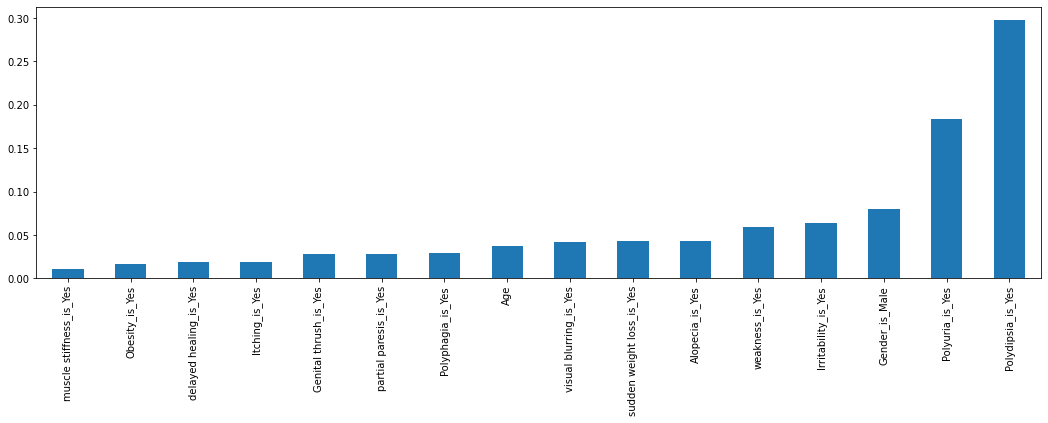

In [60]:
predictors=pd.Series(xgb.feature_importances_,index=x.columns).sort_values()
plt.figure(figsize=(18,5))
predictors.plot(kind='bar')
plt.show()

The above bar plot shows the best predictors of the target column `class` which denotes the risk of diabetes to be positive or negative. We can see that the top two predictors are `Polydipsia_is_Yes` and `Polyuria_is_Yes` which means that these two are very strong symptoms/signs that could be used to determine the risk of diabetes.

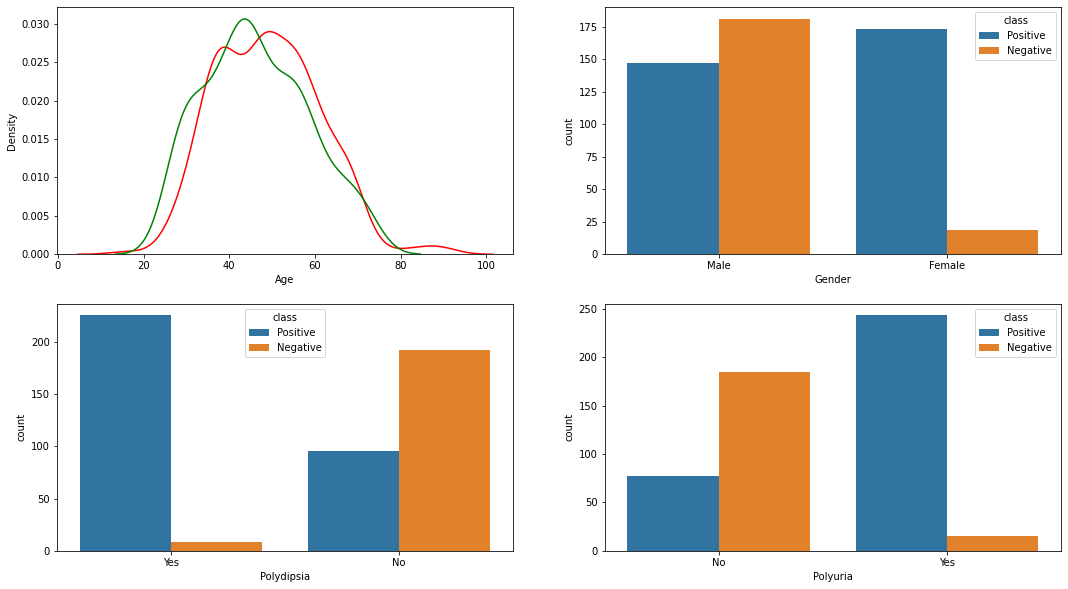

In [65]:
fig,axes=plt.subplots(2,2,figsize=(18,10))
sns.distplot(df[df['class']=='Positive']['Age'],hist=False,label='Diabetes Patient Age',color='red',ax=axes[0][0])
sns.distplot(df[df['class']=='Negative']['Age'],hist=False,label='Normal Patient Age',color='green',ax=axes[0][0])
sns.countplot(df['Gender'],hue=df['class'],ax=axes[0][1])
sns.countplot(df['Polydipsia'],hue=df['class'],ax=axes[1][0])
sns.countplot(df['Polyuria'],hue=df['class'],ax=axes[1][1])
plt.show()

We can also see that there were no significant difference in `age` distributions between negative and positive classes. But the `Gender` variable could be one decent predictor which is also the third most significant variable as given by XGBoost model. Female patients in our record have more positive to negative ratio than male patients which can show that the Female patients are prone to diabetes according to our dataset.


---

The patients who have `Polydipsia` have the positive to negative ratio than the patients who doesn't have Polydipsia. The same difference applies to the `Polyuria` as well.